In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [11]:
read_file = pd.read_csv ('dataForTrainingLogistic.txt', sep = " ", header = None)
read_file.to_csv ('dataForTrainingLogistic.csv', index=None)

In [152]:
with open('dataForTrainingLogistic.csv') as f:
    reader = csv.reader(f)
    next(reader)
    
    data = []
    for row in reader:
        data.append({
            "bias": [1],
            "evidence": [float(cell) for cell in row[:6]],
            "label": [int(cell) for cell in row[6]]
        })
        
bias = np.array([row["bias"] for row in data])
features = np.array([row["evidence"] for row in data])
features = np.append(bias, features, axis=1) # what does this function do ? (400, 7)
labels = np.array([row["label"] for row in data]) #(400, 1)
weights = np.zeros((7, 1)) # initalize weights of shape (7, 1)
print(features)

[[1.  0.4 0.8 ... 0.9 0.1 0.6]
 [1.  0.3 0.7 ... 0.9 0.2 0. ]
 [1.  0.4 0.6 ... 1.  0.6 0.7]
 ...
 [1.  1.  0.1 ... 0.4 0.8 0. ]
 [1.  0.6 0.4 ... 0.8 0.7 0.2]
 [1.  1.  0.1 ... 0.6 1.  0.1]]


In [140]:
# sigmoid activation function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [141]:
def predict(f, w):
    ''' 
    Returns 1d array of probabilities 
    that class label = 1
    '''
    z = np.dot(f, w)
    return sigmoid(z)

In [142]:
prediction = predict(features, weights)
print(weights)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [143]:
def log_likelihood(f, l, w):
     
    predictions = predict(f, w)
    
    # take error when label = 1 
    class1_cost = l * np.log(predictions)
    
    # take error when label = 0 
    class0_cost = (1 - l) * np.log(1 - predictions)
    
    # Log likelihood LL: add both costs 
    LL = class1_cost + class0_cost
    LL = LL.sum()
    
    return LL
    

In [144]:
likelihood = log_likelihood(features, labels, weights)
print(likelihood)

-277.2588722239781


In [145]:
def grad_ascent(f, l, w, lr):
    '''
    Vectorized gradient ascent
    
    Features: ()
    Labels: ()
    Weights: ()
    '''
    
    # get predictions 
    predictions = predict(f, w)
    gradient = np.dot(f.T, l - predictions)
    gradient *= lr
    w += gradient
    
    return w

In [146]:
updated_weights = grad_ascent(features, labels, np.copy(weights), 0.01)
print(updated_weights) # weights that will maximize the log likelihood

print("printing weights")
print(weights)

[[ 0.05  ]
 [-0.443 ]
 [ 0.5325]
 [-0.4455]
 [ 0.5255]
 [-0.3895]
 [-0.018 ]]
printing weights
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [190]:
# define decision boundry
def decision_boundary(prob):
    for p in prob:
        return 1 if p >= 0.5 else 0

In [203]:
def classify(predictions):
    classifications = []
    for pred in predictions:
        classifications.append(decision_boundary(pred))
    return classifications

In [149]:
def train(f, l, w, lr, epochs):
    ll_history = []
    
    for epoch in range(epochs):
        w = grad_ascent(f, l, w, lr)
        
        # calculate error 
        log_l = log_likelihood(f, l, w)
        ll_history.append(log_l)
        
        # print cost every 1000 iteration
        if epoch % 1000 == 0:
            print(f"epoch: {epoch},  log likelihood: {log_l}")
            
    return w, ll_history

In [132]:
(new_weights, history) = train(features, labels, np.copy(weights), 0.001, 10000)
print(weights)
print(new_weights)

epoch: 0,  log likelihood: -266.3472091606692
epoch: 1000,  log likelihood: -9.640339242313882
epoch: 2000,  log likelihood: -6.022907474479794
epoch: 3000,  log likelihood: -4.602829921109501
epoch: 4000,  log likelihood: -3.8112849538120486
epoch: 5000,  log likelihood: -3.295218488693929
epoch: 6000,  log likelihood: -2.9270742802023664
epoch: 7000,  log likelihood: -2.6486057680279504
epoch: 8000,  log likelihood: -2.429102786490121
epoch: 9000,  log likelihood: -2.250702378200123
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[ 1.24061751]
 [-6.50063501]
 [ 9.40883544]
 [-6.69968875]
 [ 8.43298522]
 [-4.83474866]
 [ 0.12538625]]


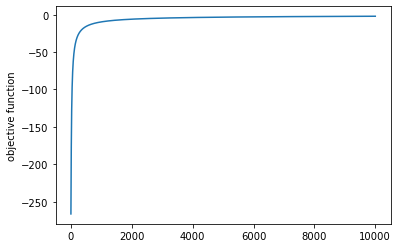

In [150]:
# plot objective function and number of iteration
plt.plot(history)
plt.ylabel("objective function")
plt.show()

In [200]:
with open('dataForTestingLogistic.csv') as f:
    reader = csv.reader(f)
    next(reader)
    
    data = []
    for row in reader:
        data.append({
            "bias": [1],
            "evidence": [float(cell) for cell in row[:6]],
            "label": [int(cell) for cell in row[6]]
        })
        
bias_test = np.array([row["bias"] for row in data])
feat_test = np.array([row["evidence"] for row in data])
feat_test = np.append(bias, feat_test, axis=1) # what does this function do ? (400, 7)
labels_test = np.array([row["label"] for row in data]).flatten() #(400, 1)
print(labels_test)

[0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1]


In [204]:
def test(f, w):
    predictions = predict(f, w)
    # compare new labels with old labels
    new_labels = classify(predictions)
    return new_labels

In [206]:
new_labels = np.array(test(feat_test, new_weights))
print(new_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [201]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [202]:
accuracy(new_labels, labels_test)

0.52